[148.88245171   0.35757787]
[[3.54590663        nan]
 [       nan 4.31934466]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


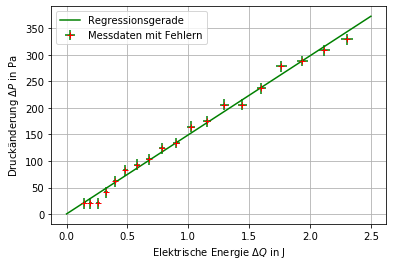

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats as sci
import scipy.optimize

u = np.loadtxt("spezwaer.txt", usecols = 0)

sigu = 5

h = np.loadtxt("spezwaer.txt", usecols = 1)/1000

sigh = 0.001


c = 20e-6 ##kapazität
rho_hg = 13.546*1000
rho_wa = 1000
r1 = 0.002
r2 = 0.00902
g = 9.81

Q = 0.5*c*u**2  

sigQ = sigu*c*u

dp = rho_wa*g*h*(1+(r1**2)/(r2**2))



sigdp = np.array([])

for i in range (len(dp)):
    sigdp = np.append(sigh*rho_wa*g*(1+r1**2/r2**2), sigdp)
    
    
def testfunc (x,M,C):
    return M*x+C

popt, pcov = scipy.optimize.curve_fit(testfunc, Q, dp, sigma=sigdp, p0=[0,0], absolute_sigma=True)


x = np.arange(0,2.5,0.001)

plt.errorbar(Q, dp, xerr = sigQ, yerr = sigdp, fmt = "+", color = "r", ecolor = "g", label = "Messdaten mit Fehlern")
plt.xlabel("Elektrische Energie $\Delta Q$ in J")
plt.ylabel("Druckänderung $\Delta P$ in Pa")
plt.plot(x, testfunc(x,popt[0],popt[1]), color = "g", label = "Regressionsgerade")
plt.grid()
plt.legend(loc = "upper left")
plt.savefig("druck.png")
print(popt)
print(np.sqrt(pcov))

In [66]:
Vz = 2551e-6
r1 = 0.002


sigVz = 7e-6

dV = r1**2*np.pi*h

sigdV = sigh*r1**2*np.pi

p0 = 98740

f = 2*(Q-p0*dV)/(Vz*dp-p0*dV)

a = 2*Vz*(p0*dV-Q)

b = Vz*dp+p0*dV

c = 2*p0*(Vz*dp+Q)

d = 2*dp*(p0*dV-Q)

sigf = np.sqrt(sigdp**2*(a/b**2)**2+sigdV**2*(c/b**2)**2+sigQ**2*(2/b)**2+sigVz**2*(d/b**2)**2)



print(f)
print(sigf)

##gew Mittelwert

a = 0
b = 0
for i in range (len(f)):
    a += f[i]/(sigf[i])**2
    b += 1/(sigf[i])**2
    
f_ = a/b
err = np.sqrt(1/b)

print(f_,err)


[ 5.65737523  7.73614043 10.13471567  6.3769478   5.23096185  4.73792139
  5.01775516  5.30558419  5.12435851  5.43596828  5.01775516  5.3375652
  5.08171717  5.67336573  5.46270825  5.12435851  5.42893949  5.54011155
  5.65737523]
[2.50096083 3.40469179 4.44755762 1.42585951 0.79693517 0.55325439
 0.52289249 0.49929578 0.40889072 0.40108813 0.30962411 0.30991451
 0.25735255 0.28331345 0.24275001 0.20064261 0.20427044 0.19611391
 0.18913985]
5.374396678798839 0.07186515824354019
